In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Embarked', ylabel='count'>

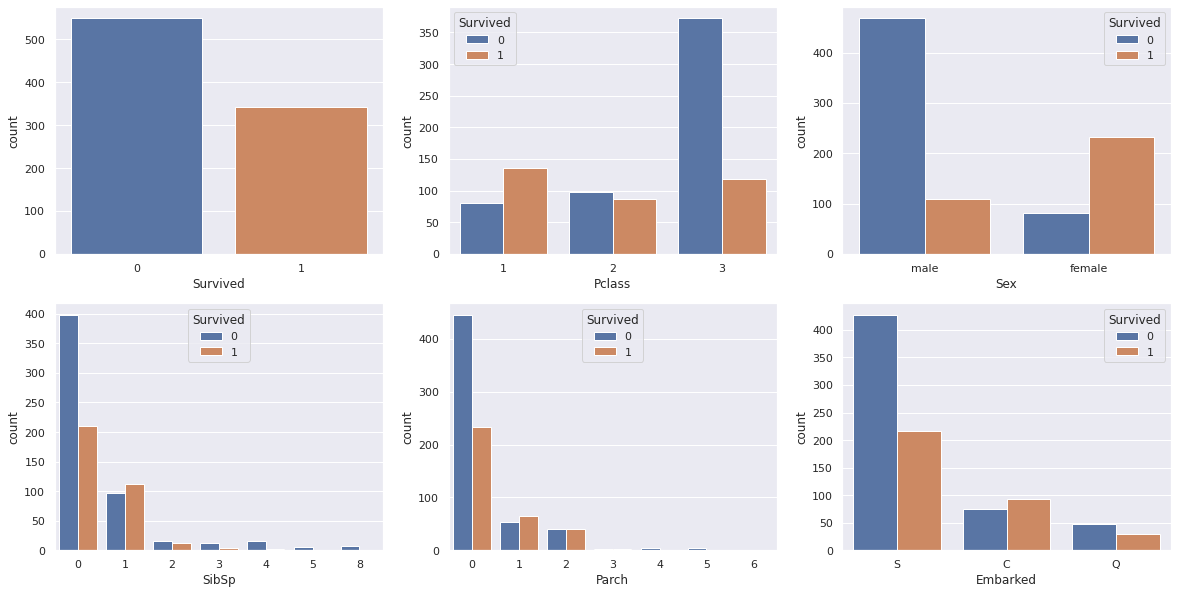

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.countplot(ax=axs[0,0], x='Survived', data=df_train)
sns.countplot(ax=axs[0,1], x='Pclass', data=df_train, hue='Survived')
sns.countplot(ax=axs[0,2], x='Sex', data=df_train, hue='Survived')
sns.countplot(ax=axs[1,0], x='SibSp', data=df_train, hue='Survived')
sns.countplot(ax=axs[1,1], x='Parch', data=df_train, hue='Survived')
sns.countplot(ax=axs[1,2], x='Embarked', data=df_train, hue='Survived')

In [6]:
# Check missing value
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Extract 'Title' from 'Name'
df_train['Title'] = df_train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test['Name'].str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [8]:
# Mapping
mapping_title = {'Capt': 0, 'Col': 0, 'Countess': 0, 'Don': 0, 'Dr': 0, 'Jonkheer': 0, 'Lady': 0, 'Major': 0, 'Master': 1, 'Miss': 1, 'Mlle': 1, 'Mme': 1,
                 'Mr': 2, 'Mrs': 3, 'Ms': 1, 'Rev': 0, 'Sir': 0}
df_train['Title'] = df_train['Title'].map(mapping_title)
df_train['Title'] = df_train['Title'].fillna(0)
df_test['Title'] = df_test['Title'].map(mapping_title)
df_test['Title'] = df_test['Title'].fillna(0)

df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [9]:
# Fill missing value of 'Age' and 'Embarked'
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_train['Embarked'] = df_train['Embarked'].map({'S': 2, 'C': 1, 'Q':0})

df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test['Embarked'] = df_test['Embarked'].fillna('S')
df_test['Embarked'] = df_test['Embarked'].map({'S': 2, 'C': 1, 'Q':0})

In [10]:
# Split 'Age' into 5 groups
df_train.loc[df_train['Age'] <= 15, 'Age'] = 0
df_train.loc[(df_train['Age'] > 15) & (df_train['Age'] <= 30), 'Age'] = 1
df_train.loc[(df_train['Age'] > 30) & (df_train['Age'] <= 45), 'Age'] = 2
df_train.loc[(df_train['Age'] > 45) & (df_train['Age'] <= 60), 'Age'] = 3
df_train.loc[df_train['Age'] > 60, 'Age'] = 1

df_test.loc[df_test['Age'] <= 15, 'Age'] = 0
df_test.loc[(df_test['Age'] > 15) & (df_test['Age'] <= 30), 'Age'] = 1
df_test.loc[(df_test['Age'] > 30) & (df_test['Age'] <= 45), 'Age'] = 2
df_test.loc[(df_test['Age'] > 45) & (df_test['Age'] <= 60), 'Age'] = 3
df_test.loc[df_test['Age'] > 60, 'Age'] = 1

In [11]:
# Take log on 'Fare'
df_train['Log_Fare'] = df_train['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)
df_test['Log_Fare'] = df_test['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)

In [12]:
df_train.shape, df_test.shape

((891, 14), (418, 13))

In [13]:
# Drop 'PassengerId', 'Name', 'Ticket' and 'Cabin'
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)
df_test = df_test.drop(['Name', 'Ticket', 'Fare', 'Cabin'], axis=1)

df_train.shape, df_test.shape

((891, 9), (418, 9))

In [14]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Log_Fare
0,0,3,1,1.0,1,0,2,2,1.981001
1,1,1,0,2.0,1,0,1,3,4.266662
2,1,3,0,1.0,0,0,2,1,2.070022
3,1,1,0,2.0,1,0,2,3,3.972177
4,0,3,1,2.0,0,0,2,2,2.085672
...,...,...,...,...,...,...,...,...,...
886,0,2,1,1.0,0,0,2,0,2.564949
887,1,1,0,1.0,0,0,2,1,3.401197
888,0,3,0,1.0,1,2,2,1,3.154870
889,1,1,1,1.0,0,0,1,2,3.401197


In [15]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Log_Fare
0,892,3,1,2.0,0,0,0,2.0,2.057860
1,893,3,0,3.0,1,0,2,3.0,1.945910
2,894,2,1,1.0,0,0,0,2.0,2.270836
3,895,3,1,1.0,0,0,2,2.0,2.159003
4,896,3,0,1.0,1,1,2,3.0,2.508582
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,2.0,0,0,2,2.0,2.085672
414,1306,1,0,2.0,0,0,1,0.0,4.690430
415,1307,3,1,2.0,0,0,2,2.0,1.981001
416,1308,3,1,2.0,0,0,2,2.0,2.085672


In [16]:
from sklearn.model_selection import train_test_split

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 8), (268, 8), (623,), (268,))

In [17]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold


knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()
lr = LogisticRegression(solver='liblinear')
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
nn = MLPClassifier()

cv = KFold(n_splits=10, shuffle=True, random_state=123)

knn_score = round(cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy').mean(), 4)
dt_score = round(cross_val_score(dt, X_train, y_train, cv=cv, scoring='accuracy').mean(), 4)
nb_score = round(cross_val_score(nb, X_train, y_train, cv=cv, scoring='accuracy').mean(), 4)
lr_score = round(cross_val_score(lr, X_train, y_train, cv=cv, scoring='accuracy').mean(), 4)
rf_score = round(cross_val_score(rf, X_train, y_train, cv=cv, scoring='accuracy').mean(), 4)
gb_score = round(cross_val_score(gb, X_train, y_train, cv=cv, scoring='accuracy').mean(), 4)
svc_score = round(cross_val_score(svc, X_train, y_train, cv=cv, scoring='accuracy').mean(), 4)
nn_score = round(cross_val_score(nn, X_train, y_train, cv=cv, scoring='accuracy').mean(), 4)

summary_dict = {'Score': [knn_score, dt_score, nb_score, lr_score, rf_score, gb_score, svc_score, nn_score]}

summary = pd.DataFrame(data=summary_dict, index=['KNN', 'Decision Tree', 'Naive Bayes', 'Logistic Regression',
                                                 'Random Forest', 'Gradient Boosting', 'SVC', 'Neural Netword'])
summary.sort_values(by='Score', ascending=False)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Score
Neural Netword,0.8186
SVC,0.8169
Gradient Boosting,0.8122
Random Forest,0.8059
KNN,0.7996
Decision Tree,0.7865
Logistic Regression,0.7817
Naive Bayes,0.7593


In [18]:
test = df_test.drop('PassengerId', axis=1)
test_id = df_test['PassengerId']

svc.fit(X_train, y_train)
y_pred = svc.predict(test)
y_pred = pd.DataFrame(y_pred, columns=['Survived'])
y_pred

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [19]:
# Get the 'Id' column from the original test dataset
# Combine 'Id' and the prediction into a new dataframe

result = pd.concat([test_id, y_pred], axis=1)
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [20]:
result.to_csv('submission.csv', index=False)